# Lab 8: Define and Solve an ML Problem of Your Choosing

In [20]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [21]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(airbnbDataSet_filename)

df.head()

,name,description,neighborhood_overview,host_name,host_location,host_about,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications
0,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,Jennifer,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,0.80,0.17,True,8.0,...,4.79,4.86,4.41,False,3,3,0,0,0.33,9
1,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,LisaRoxanne,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,0.09,0.69,True,1.0,...,4.80,4.71,4.64,False,1,1,0,0,4.86,6
2,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,Rebecca,"Brooklyn, New York, United States","Rebecca is an artist/designer, and Henoch is i...",1.00,0.25,True,1.0,...,5.00,4.50,5.00,False,1,1,0,0,0.02,3
3,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",Shunichi,"New York, New York, United States",I used to work for a financial industry but no...,1.00,1.00,True,1.0,...,4.42,4.87,4.36,False,1,0,1,0,3.68,4
4,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,MaryEllen,"New York, New York, United States",Welcome to family life with my oldest two away...,NaN,NaN,True,1.0,...,4.95,4.94,4.92,False,1,0,1,0,0.87,7


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

1. the data set I will chose is the airbnbDataSet
2. I will be predicting the rating of the airbnb from the guests based on the other features listed.
3. This is a supervised learning problem because we have known features and a known label. This is a regression problem since the rating is on a 0-100 scale. This can turn into a binary classification problem as we can seperate the ratings between 0-60, and 60-100, to classify if it is a high rating or not a high rating.
4. My features will be Host information: host_location, host_identity, host_neighbourhood, host_acceptance_rate, host_response_rate, Airbnb details:Bathrooms, beds, amenities, price.

5. This is an important problem because it shows the predicted rating, which is important for the company so they can know what needs to improve to make their rating higher, and so more people can come to their company.
   

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [22]:
print(df.describe())
print(df.dtypes)

       host_response_rate  host_acceptance_rate  host_listings_count  \
count        16179.000000          16909.000000         28022.000000   
mean             0.906901              0.791953            14.554778   
std              0.227282              0.276732           120.721287   
min              0.000000              0.000000             0.000000   
25%              0.940000              0.680000             1.000000   
50%              1.000000              0.910000             1.000000   
75%              1.000000              1.000000             3.000000   
max              1.000000              1.000000          3387.000000   

       host_total_listings_count  accommodates     bathrooms      bedrooms  \
count               28022.000000  28022.000000  28022.000000  25104.000000   
mean                   14.554778      2.874491      1.142174      1.329708   
std                   120.721287      1.860251      0.421132      0.700726   
min                     0.000000      1

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

1. Yes I have a new feature list, I decided not to keep the names of the hosts, or id, or the name of the room, or the hosts about as they are not important. The features that I have chosen to keep are accommodates, bedrooms, bathrooms, price, number_of_reviews, reviews_per_month, room_type, neighbourhood_group.
2. Different data preperation techniques that I will use is getting rid of null and missing value. I can also drop columns that I know is irrelevant to the model. I will one hot encode different features such as room_type and neighborhood_group. 
3. My models that I am going to use is LogisticRegression and RandomForests 
4. I will first split the cleaned data, then create a LinearRegression model. From there, I will train the model and capture its RSME and  R² scores. Then, I will implement a Random Forest model and also capture its RMSE and R² scores. After that, I plan to tune the hyperparameters of Random Forest and use Grid Search to improve the accuracy of the model overfitting. Finally, I will compare the models based on the RSME and R2 scores, and select the best-performing model 

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [24]:

print(df.columns.tolist())
df.drop(columns=['name', 'description', 'neighborhood_overview', 'host_name', 'host_about', 'host_location'], inplace=True)


df.dropna(inplace=True)


df['host_is_superhost'] = df['host_is_superhost'].astype(int)

## one hot encoding
categorical_cols = ['room_type', 'neighbourhood_group_cleansed']  

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

df_encoded = df.select_dtypes(include=['int64', 'float64'])


['name', 'description', 'neighborhood_overview', 'host_name', 'host_location', 'host_about', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_listings_count', 'host_total_listings_count', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood_group_cleansed', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'instant_bookable', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'c

In [25]:
# okay so train train train

y = df_encoded['review_scores_rating']
X = df_encoded.drop(columns = 'review_scores_rating')


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1234)

In [27]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_lr_pred = lr_model.predict(X_test)

lr_rmse = mean_squared_error(y_test, y_lr_pred, squared = False)

lr_r2 = r2_score(y_test, y_lr_pred)

print('[LR] Root Mean Squared Error: {0}'.format(lr_rmse))
print('[LR] R2: {0}'.format(lr_r2))

[LR] Root Mean Squared Error: 0.20212997126420046
[LR] R2: 0.8447732968760235


In [28]:
#random forests
print('Begin RF Implementation...')

rf_model = RandomForestRegressor(max_depth = 32, n_estimators = 300)
rf_model.fit(X_train, y_train)
print('End')

y_rf_pred = rf_model.predict(X_test)


#Compute the RMSE 
rf_rmse = mean_squared_error(y_test, y_rf_pred, squared = False)

# 3. Compute the R2 score 
rf_r2 = r2_score(y_test, y_rf_pred)

print('[RF] Root Mean Squared Error: {0}'.format(rf_rmse))
print('[RF] R2: {0}'.format(rf_r2))                 


Begin RF Implementation...
End
[RF] Root Mean Squared Error: 0.21154310295031606
[RF] R2: 0.829978929697045


In [50]:
# grid search to improve
param_grid = {
    'n_estimators': [200],
    'max_depth': [ 20, 30],
    'min_samples_split': [10,20],
    'min_samples_leaf': [5],
}


print("starting grid search")

rf_regressor = RandomForestRegressor(random_state = 1234)



rf_grid = GridSearchCV(rf_regressor, param_grid, cv = 3, scoring = 'neg_root_mean_squared_error',  n_jobs=-1)



rf_grid_search = rf_grid.fit(X_train, y_train)

print('Done')

starting grid search
Done


In [51]:
rmse_rf = -1 * rf_grid_search.best_score_
print("[DT] RMSE for the best model is : {:.2f}".format(rmse_rf) )

[DT] RMSE for the best model is : 0.21


In [55]:
rf_best_params = rf_grid_search.best_params_

rf_best_params

{'max_depth': 20,
 'min_samples_leaf': 5,
 'min_samples_split': 20,
 'n_estimators': 200}

In [57]:
rf_model = RandomForestRegressor(max_depth = 20, min_samples_leaf = 5,min_samples_split = 20, n_estimators = 200 )
rf_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=20, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=20, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [58]:

y_rf_pred = rf_model.predict(X_test)



rf_rmse = mean_squared_error(y_test, y_rf_pred, squared = False)


rf_r2 = r2_score(y_test, y_rf_pred)


print('[DT] Root Mean Squared Error: {0}'.format(rf_rmse))
print('[DT] R2: {0}'.format(rf_r2))

[DT] Root Mean Squared Error: 0.20940694760206727
[DT] R2: 0.8333953272638573


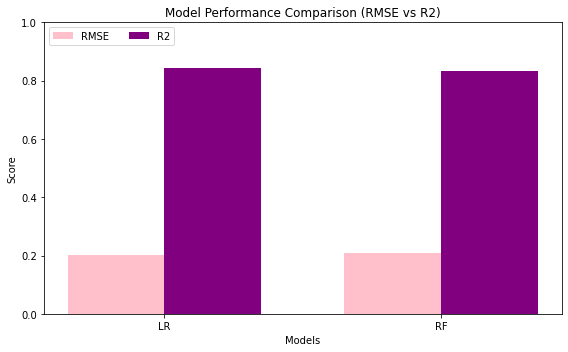

In [59]:
import numpy as np
import matplotlib.pyplot as plt


RMSE_Results = [lr_rmse, rf_rmse]
R2_Results = [lr_r2, rf_r2]

rg = np.arange(2)  
width = 0.35


plt.figure(figsize=(8, 5))


plt.bar(rg, RMSE_Results, width=width, label='RMSE', color='pink')


plt.bar(rg + width, R2_Results, width=width, label='R2', color='purple')

#
labels = ['LR', 'RF']
plt.xticks(rg + width / 2, labels)
plt.xlabel("Models")
plt.ylabel("Score")
plt.ylim([0, 1]) 
plt.title('Model Performance Comparison (RMSE vs R2)')
plt.legend(loc='upper left', ncol=2)

plt.tight_layout()
plt.show()


In [60]:
# overfiting check for randomforests
y_train_pred = rf_model.predict(X_train)


train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
train_r2 = r2_score(y_train, y_train_pred)

# Predict on test set
y_test_pred = rf_model.predict(X_test)


test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Train RMSE: {train_rmse:.3f}, Train R2: {train_r2:.3f}")
print(f"Test RMSE: {test_rmse:.3f}, Test R2: {test_r2:.3f}")

Train RMSE: 0.157, Train R2: 0.893
Test RMSE: 0.209, Test R2: 0.833


In [49]:
# overfiting/underfitting check for linear regression

y_train_pred = lr_model.predict(X_train)


train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
train_r2 = r2_score(y_train, y_train_pred)

# Predict on test set
y_test_pred = lr_model.predict(X_test)


test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Train RMSE: {train_rmse:.3f}, Train R2: {train_r2:.3f}")
print(f"Test RMSE: {test_rmse:.3f}, Test R2: {test_r2:.3f}")

Train RMSE: 0.198, Train R2: 0.831
Test RMSE: 0.202, Test R2: 0.845
